This notebook will be showcasing how to create spectrograms of various earthquake and non-earthquake signals. A spectograms shows the value from the amplitudes of a range of frecuencies given in any signal.

In [1]:
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")#https://docs.obspy.org/packages/obspy.core.html#event-metadata

Matplotlib is building the font cache; this may take a moment.


The first spectrogram examples we will consider are a comparison of an earthquake and an explosion with similar energy release (magnitude ~ 3) from a similar location. We will first examine data from an earthquake near the Arizona-New Mexico border starting at 06:15:50 UTC time on July 11, 2014

In [2]:
station="TUC"
channel="BHZ"
location="00"
network="IU"
startt = UTCDateTime("2014-07-11T06:15:50") 
endt = UTCDateTime("2014-07-11T06:17:50")
st=client.get_waveforms(network,station,location,channel,startt,endt)

Then we will extract a seismic trace from the stream downloaded and then plot the trace.

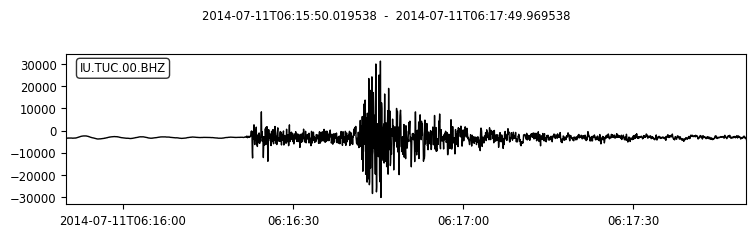

In [3]:
tr=st[0]
plt.rcParams['figure.figsize'] = (12, 4)
fig=tr.plot()
plt.show()

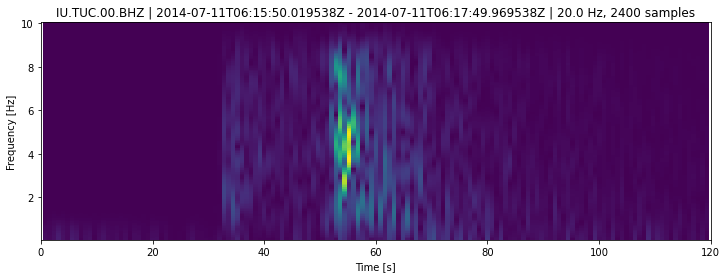

In [4]:
fig=tr.spectrogram(per_lap=0.5,wlen=2)

The spectrogram shows that in the maximum energy from the trace(max amplitude), the frequencies are near most common 4-6 Hz .The energy starts abruptly in time, An abrupt burst (<10 s) of energy can be seen across almost all observed frequencies (between 1 and 9 Hz). The energy stops gradually over time.

Next we will examine a seismogram from an explosion of similar size at the same station. The time to request for this event is December 27, 1999 at 20:58:30,

In [5]:
startt = UTCDateTime("1999-12-27T20:58:30")
endt = UTCDateTime("1999-12-27T21:00:30") 
st = client.get_waveforms(network, station, location, channel, startt, endt)

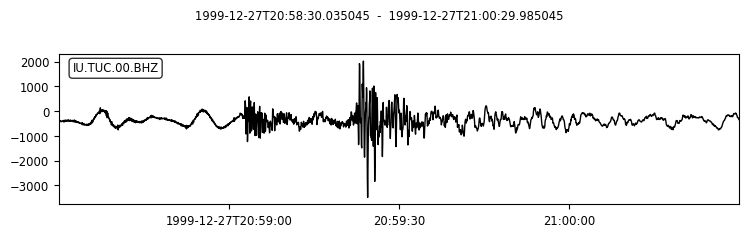

In [6]:
tr=st[0]
fig=tr.plot()

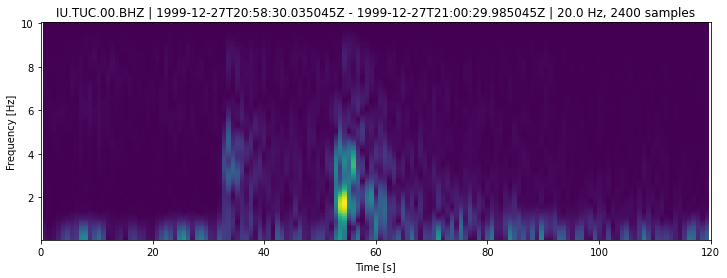

In [7]:
fig=tr.spectrogram(per_lap=0.5,wlen=2)

 The energy starts abruptly in time.  An abrupt burst (<10 s) of energy can be seen on frequencies less than 5 Hz. The energy stops gradually over time. 

Earthquakes typically have energy over a wider range of frequencies than explosions. Although this earthquake has energy at frequencies higher than the explosion, it also has energy at the frequencies common for explosions. This highlights how it can be difficult to discern between them if only look at a narrow range of frequencies.

<b>Ice quakes from Antarctica</b>

The time to request for this event is October 27, 2005 at 08:15:00, and you should request one hour of data

In [8]:
client = Client("IRIS")
net = "XV"
sta = "B15A"
loc = "01"
cha = "HHZ"
startt=UTCDateTime("2005-10-27T08:15")
endt = UTCDateTime("2005-10-27T09:15")
st=client.get_waveforms(net,sta,loc,cha,startt,endt)


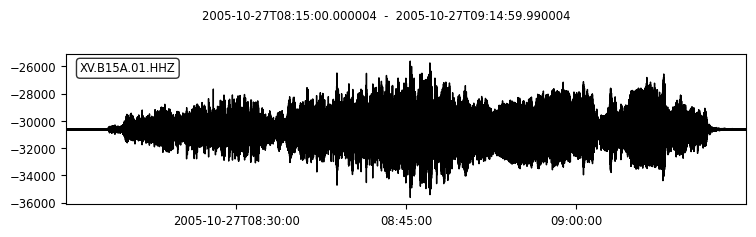

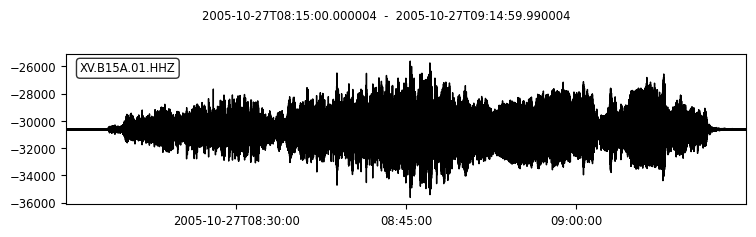

In [9]:
tr=st[0]
tr.plot()

(9.6790140667395863e-05, 800.0)


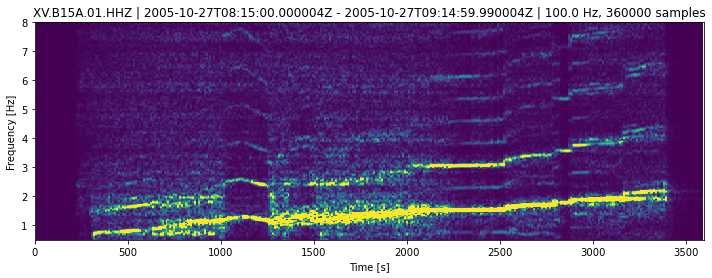

In [10]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
ax.set_ylim(0.5, 8)
im = ax.images[0]
im.set_clim(vmax=800)
print(im.get_clim())

The energy starts abruptly in time. There is sustained energy strongest at a particular frequency that gradually glides from lower to higher frequencies over time. The sustained energy pattern is repeated at higher frequencies that represent harmonic resonance. The energy stops abruptly in time.

<b>San Andreas Fault</b>

Examine the effects of the 2002 Magnitude 7.8 Denali earthquake on the San Andreas Fault

In [11]:
client = Client("NCEDC")
net = "BK"
sta = "PKD"
loc = ""
cha = "HHE"
startt = UTCDateTime("2002-11-03T22:18")
endt = UTCDateTime("2002-11-03T22:41")
st=client.get_waveforms(net,sta,loc,cha,startt,endt)

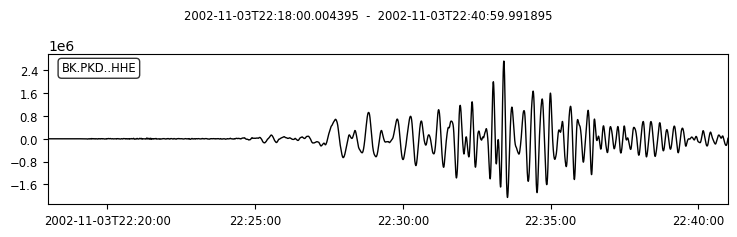

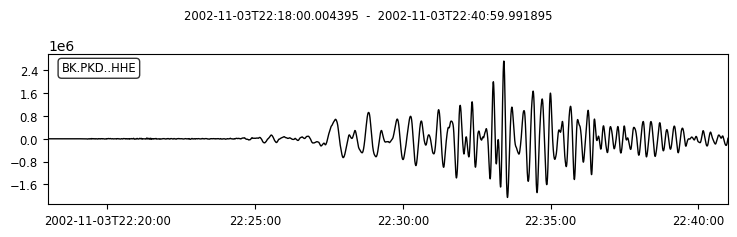

In [12]:
tr=st[0]
tr.plot()

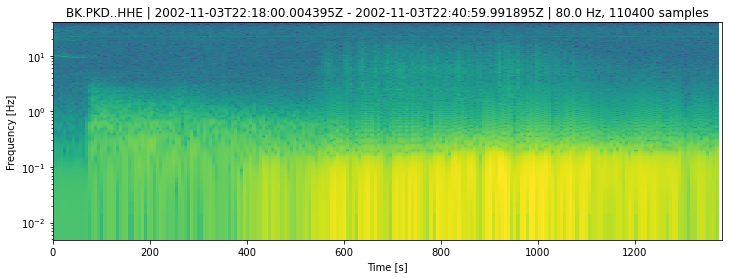

In [13]:
fig = tr.spectrogram(per_lap=.5, wlen=10,log=True,dbscale=True)
#The energy at low frequencies from the surface waves of such a 
#larger earthquake are too big to see anything at high frequency. 
#For example, we cannot see the P wave, which would have energy around 1 Hz. 
#One way to deal with this is to change the amplitude scale to a decibel-type
#logarithmic system.

This spectrogram should also illustrate something is going on at higher frequencies later in time that we could not see in the first log spectrogram plot. 

(-10.0, 50.0)


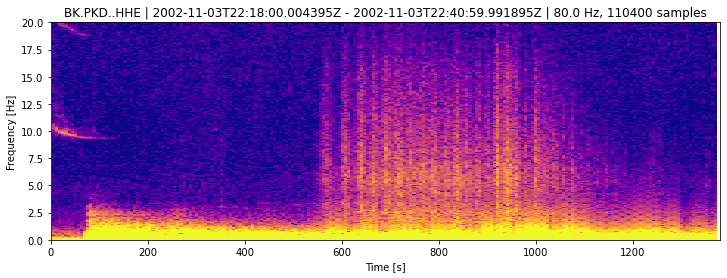

In [14]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True,cmap='plasma')
ax = fig.axes[0]
ax.set_ylim(0, 20)
im = ax.images[0]
im.set_clim(vmin=-10,vmax=50)
print(im.get_clim())

 A series of short energy bursts at frequencies higher than 1 Hz. Since this visually-enhanced spectrogram reveals some high frequency signals that we cannot see in the original seismogram, we can use a filter to see these signals in the seismogram

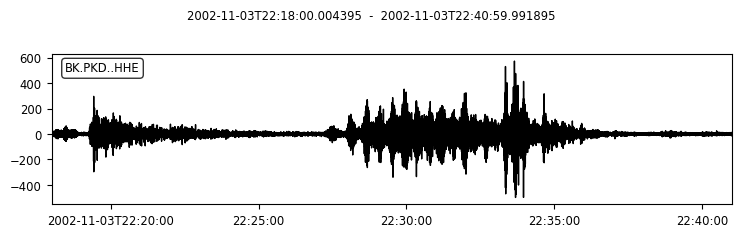

In [15]:
ftr=tr.copy()
ftr.filter(type='bandpass',freqmin=2.0,freqmax=20.0)
fig=ftr.plot()

tremor on the San Andreas Fault triggered by surface waves from a large earthquake on the Denali Fault Correct. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GL036080